In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()

In [2]:
X=iris['data'][:,2:]
std_dev=np.std(X,axis=0)
mean=np.mean(X,axis=0)
X=X-mean/std_dev

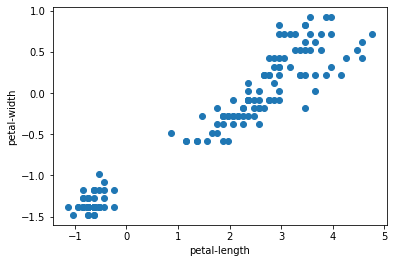

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
def iris_viz():
    plt.scatter(X[:,0],X[:,1])
    plt.xlabel('petal-length')
    plt.ylabel('petal-width')
iris_viz()
plt.show()

In [4]:
import random
n_clusters=3
n_iterations=10
clusters=[]
for _ in range(n_clusters):
    clusters.append(random.choice(X))
clusters=np.array(clusters)    

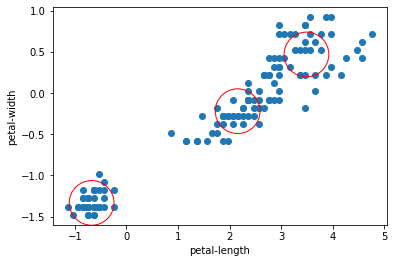

In [5]:
def compute_new_centroids(x,clusters):
    elements=[]
    for _ in range(len(clusters)):
        elements.append([])
    for point in X:    
        mini_dist=np.inf
        best_cluster=None
        label=None
        for nth_cluster in range(len(clusters)):
            distance=(point[0]-clusters[nth_cluster][0])**2 + (point[1]-clusters[nth_cluster][1])**2
            if distance<mini_dist:
                mini_dist=distance
                best_cluster=point.copy()
                label=nth_cluster
        elements[label].append(best_cluster)
    elements=np.array(elements)
    new_centroids=[]
    for region in elements:
        sum_1=0
        sum_2=0
        for i in region:
            sum_1+=i[0]
            sum_2+=i[1]
        sum_1/=len(region)
        sum_2/=len(region)
        new_centroids.append([sum_1,sum_2])
    new_centroids=np.array(new_centroids)        
    return new_centroids
for _ in range(n_iterations):
    clusters=compute_new_centroids(X,clusters)
iris_viz()
plt.scatter(clusters[:,0],clusters[:,1],s=2000,facecolors='none',edgecolor='r')
plt.show()